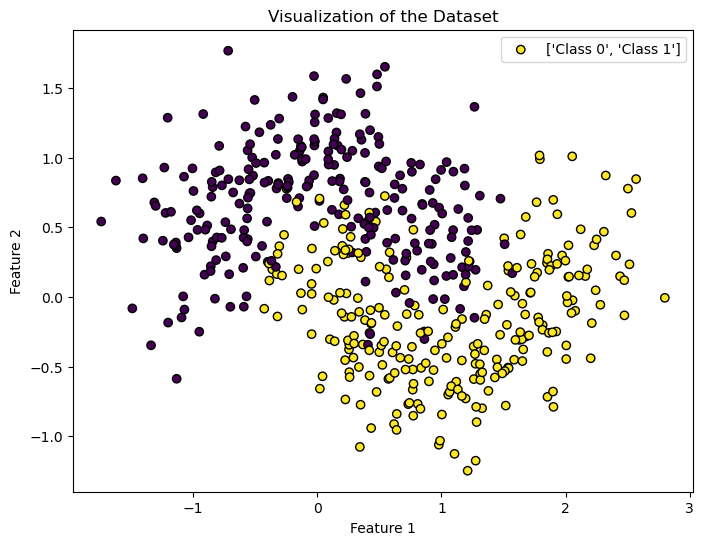

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
X = np.load('moon-all-input.npy')
y = np.load('moon-all-output.npy')

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', label=['Class 0', 'Class 1'])
plt.title('Visualization of the Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [2]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X_train, X_test = X[:375], X[375:]
y_train, y_test = y[:375], y[375:]

# Verify the balance of the test set
test_set_balance = np.bincount(y_test) / len(y_test)
print(f"Balance of the test set: {test_set_balance}")


Balance of the test set: [0.488 0.512]


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Parameters
n_estimators = 3000
learning_rate = 1

# Initializing weights
weights = np.ones(len(X_train)) / len(X_train)

# Store base classifiers and their respective metadata
base_classifiers = []
alphas = []  # Classifier weights
errors = []  # Weighted error rates
accuracy_scores_train = []  # Cumulative accuracy scores on the training set for ensemble models
accuracy_scores_test = []  # Cumulative accuracy scores on the test set for ensemble models
base_accuracy_scores_train = []  # Individual accuracy scores on the training set for base classifiers

# Accumulated sum of predictions, weighted by classifier weights, for test set
accumulated_predictions_test = np.zeros(len(X_test))

for i in range(n_estimators):
    clf = DecisionTreeClassifier(max_depth=1, random_state=42)
    clf.fit(X_train, y_train, sample_weight=weights)
    
    predictions_train = clf.predict(X_train)
    incorrect_train = (predictions_train != y_train)
    weighted_error = np.dot(weights, incorrect_train) / sum(weights)
    
    # Prevent division by zero or log(0) in alpha calculation
    if weighted_error <= 0 or weighted_error >= 1:
        break

    alpha = learning_rate * np.log((1 - weighted_error) / max(weighted_error, 1e-10))
    weights *= np.exp(alpha * incorrect_train)
    weights /= sum(weights)
    predictions_test = clf.predict(X_test)
    accumulated_predictions_test += alpha * (predictions_test * 2 - 1)  # Adjusted for {-1, 1}

    # Append classifier and its alpha
    base_classifiers.append(clf)
    alphas.append(alpha)
    errors.append(weighted_error)
    
    # Record the accuracy of this base classifier
    base_accuracy = accuracy_score(y_train, predictions_train)
    base_accuracy_scores_train.append(base_accuracy)
    
    # Calculate ensemble predictions and their accuracies
    if len(base_classifiers) > 0:
        ensemble_predictions_train = np.sign(np.sum([alphas[j] * (base_classifiers[j].predict(X_train) * 2 - 1) for j in range(len(base_classifiers))], axis=0))
        ensemble_accuracy_train = accuracy_score(y_train, (ensemble_predictions_train + 1) // 2)
        
        ensemble_predictions_test = np.sign(accumulated_predictions_test)
        ensemble_accuracy_test = accuracy_score(y_test, (ensemble_predictions_test + 1) // 2)
        
        # Record the cumulative accuracy of the ensemble
        accuracy_scores_train.append(ensemble_accuracy_train)
        accuracy_scores_test.append(ensemble_accuracy_test)




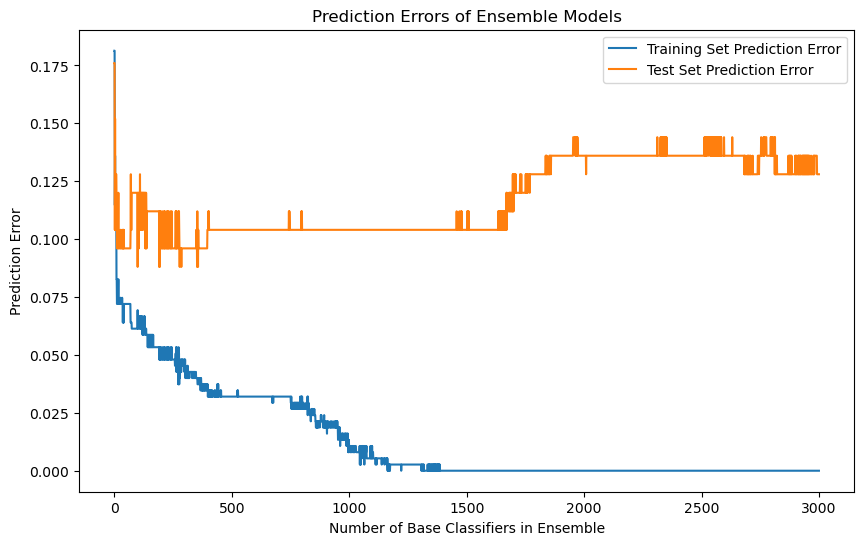

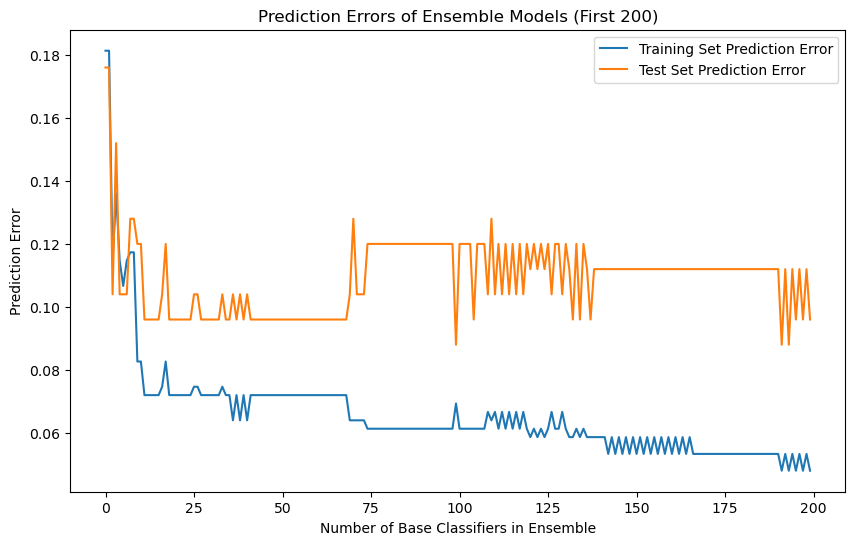

In [4]:


# Calculate prediction errors
prediction_errors_train = [1 - acc for acc in accuracy_scores_train]
prediction_errors_test = [1 - acc for acc in accuracy_scores_test]

# Plot prediction errors over all ensemble models
plt.figure(figsize=(10, 6))
plt.plot(prediction_errors_train, label='Training Set Prediction Error')
plt.plot(prediction_errors_test, label='Test Set Prediction Error')
plt.xlabel('Number of Base Classifiers in Ensemble')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors of Ensemble Models')
plt.legend()
plt.show()

# Zoom into the first 200 ensemble models
plt.figure(figsize=(10, 6))
plt.plot(prediction_errors_train[:200], label='Training Set Prediction Error')
plt.plot(prediction_errors_test[:200], label='Test Set Prediction Error')
plt.xlabel('Number of Base Classifiers in Ensemble')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors of Ensemble Models (First 200)')
plt.legend()
plt.show()


/Users/teddyanderson/miniforge3/envs/env-basic/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120572 (\N{MATHEMATICAL ITALIC SMALL ALPHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


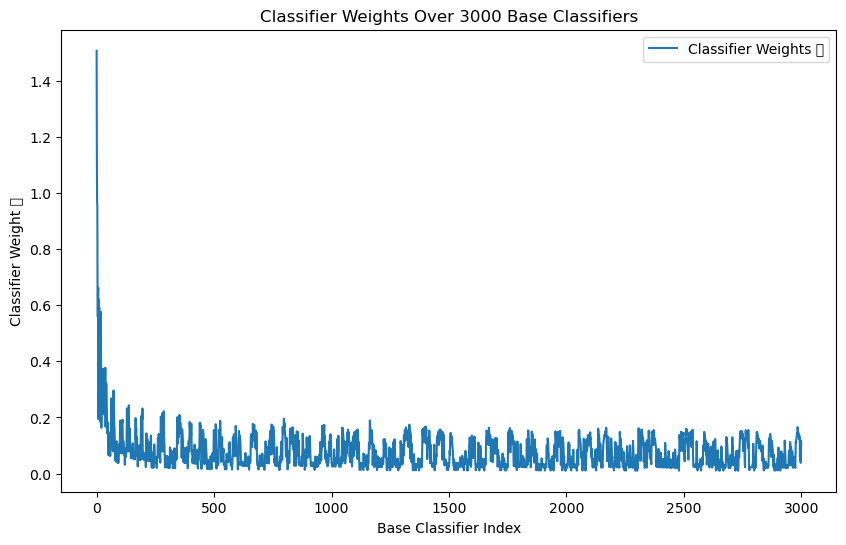

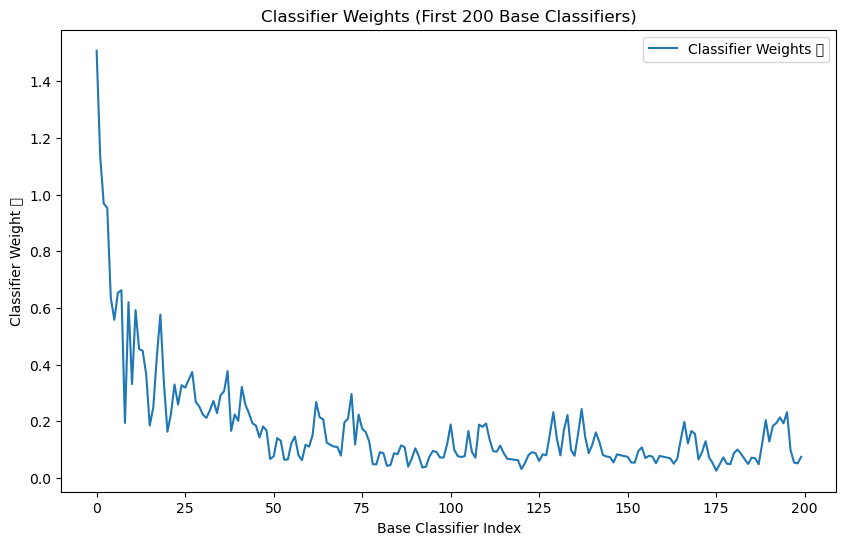

/Users/teddyanderson/miniforge3/envs/env-basic/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120598 (\N{MATHEMATICAL ITALIC EPSILON SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


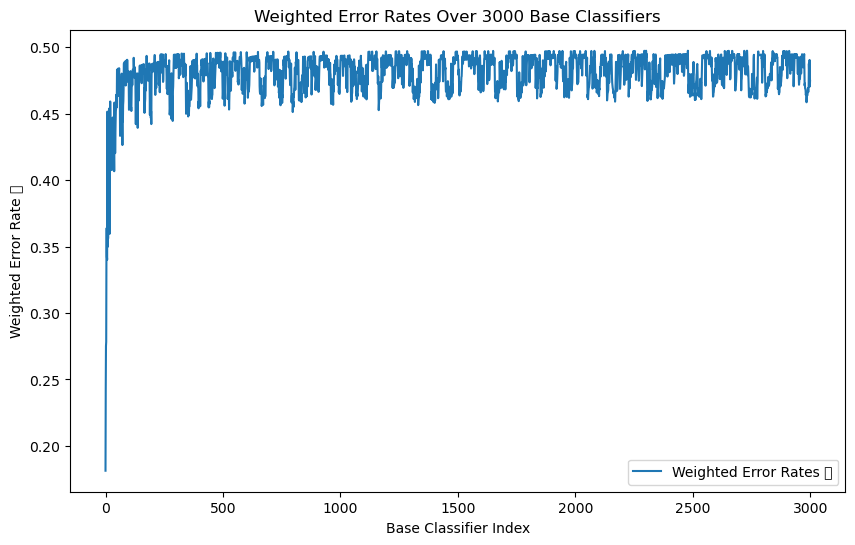

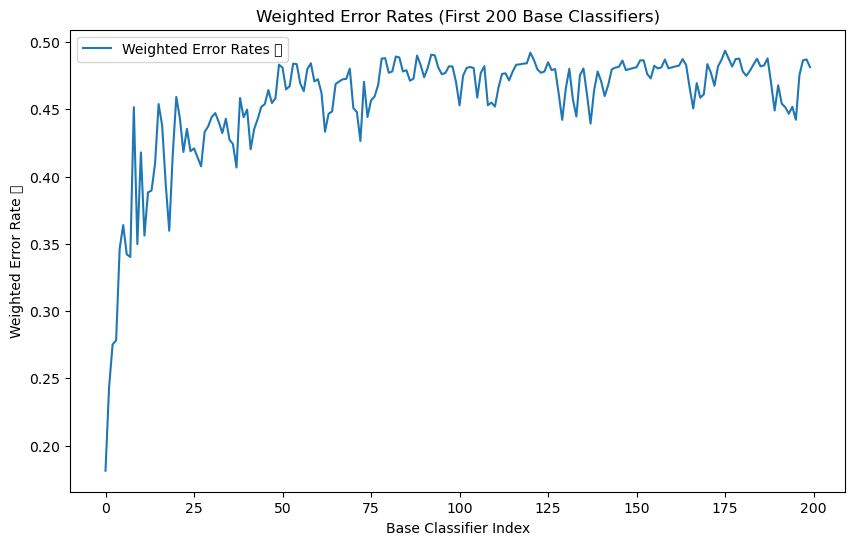

In [5]:
# Plot classifier weights 𝛼
plt.figure(figsize=(10, 6))
plt.plot(alphas, label='Classifier Weights 𝛼')
plt.xlabel('Base Classifier Index')
plt.ylabel('Classifier Weight 𝛼')
plt.title('Classifier Weights Over 3000 Base Classifiers')
plt.legend()
plt.show()

# Zoom into the first 200 classifiers
plt.figure(figsize=(10, 6))
plt.plot(alphas[:200], label='Classifier Weights 𝛼')
plt.xlabel('Base Classifier Index')
plt.ylabel('Classifier Weight 𝛼')
plt.title('Classifier Weights (First 200 Base Classifiers)')
plt.legend()
plt.show()

# Plot weighted error rates 𝜖
plt.figure(figsize=(10, 6))
plt.plot(errors, label='Weighted Error Rates 𝜖')
plt.xlabel('Base Classifier Index')
plt.ylabel('Weighted Error Rate 𝜖')
plt.title('Weighted Error Rates Over 3000 Base Classifiers')
plt.legend()
plt.show()

# Zoom into the first 200 classifiers
plt.figure(figsize=(10, 6))
plt.plot(errors[:200], label='Weighted Error Rates 𝜖')
plt.xlabel('Base Classifier Index')
plt.ylabel('Weighted Error Rate 𝜖')
plt.title('Weighted Error Rates (First 200 Base Classifiers)')
plt.legend()
plt.show()


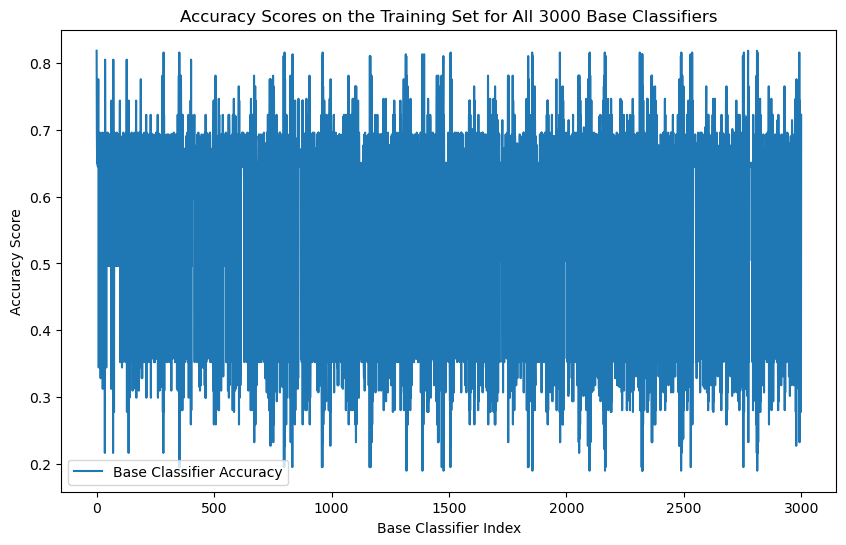

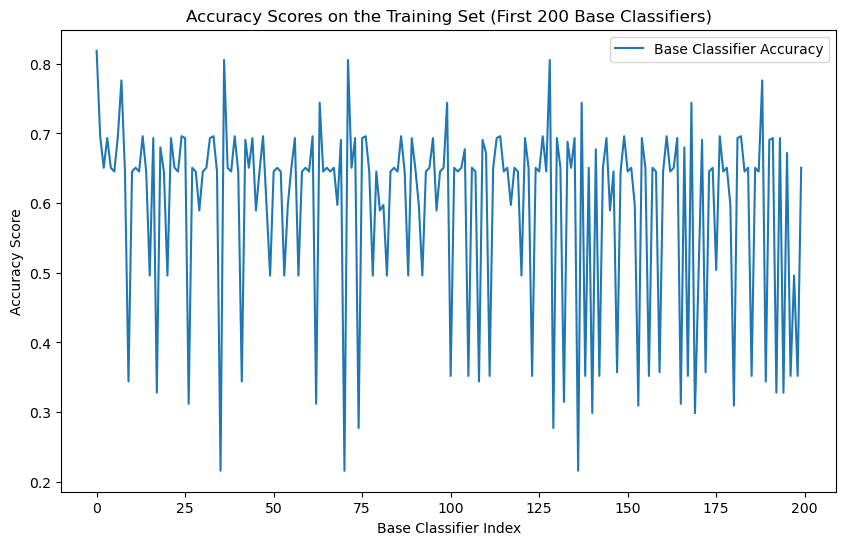

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(base_accuracy_scores_train, label='Base Classifier Accuracy')
plt.xlabel('Base Classifier Index')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores on the Training Set for All 3000 Base Classifiers')
plt.legend()
plt.show()

# Zoom into the first 200 classifiers
plt.figure(figsize=(10, 6))
plt.plot(base_accuracy_scores_train[:200], label='Base Classifier Accuracy')
plt.xlabel('Base Classifier Index')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores on the Training Set (First 200 Base Classifiers)')
plt.legend()
plt.show()



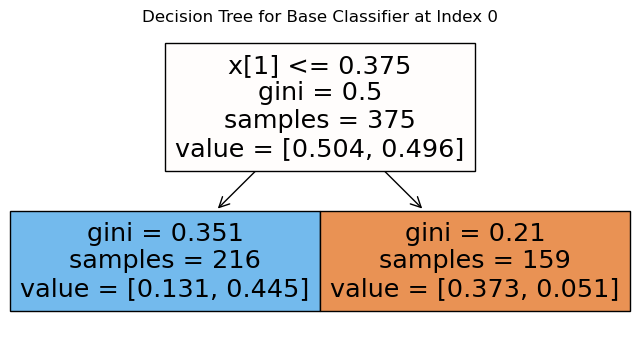

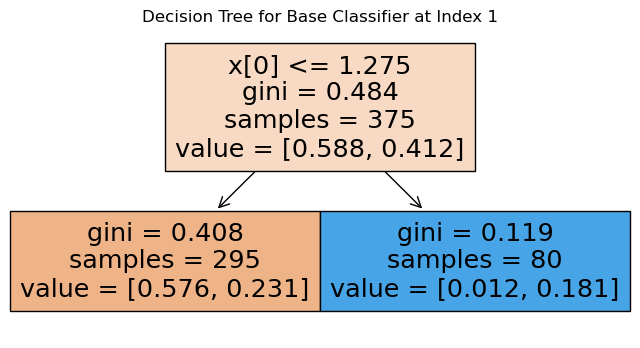

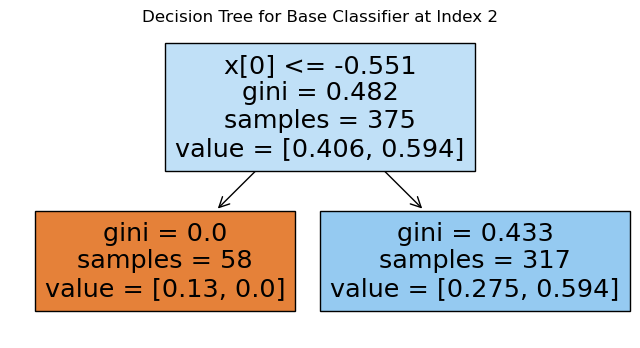

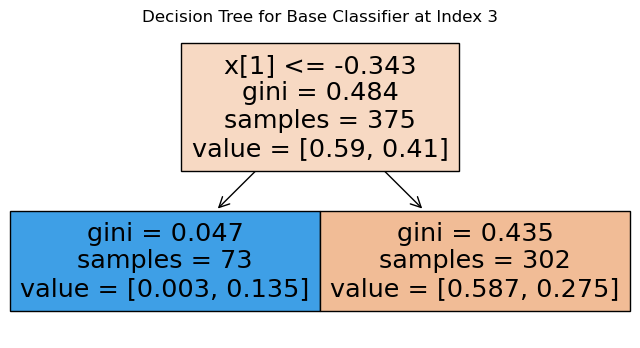

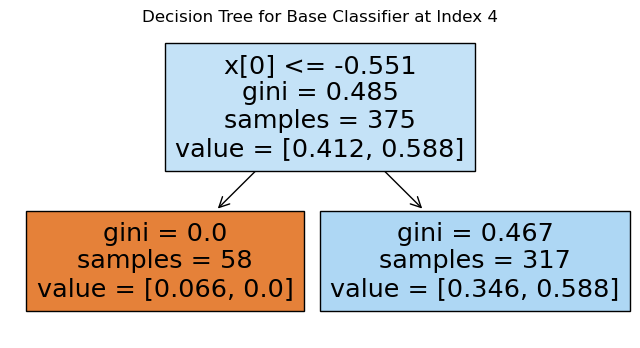

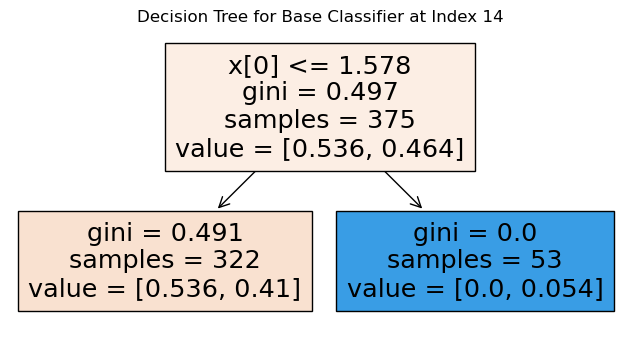

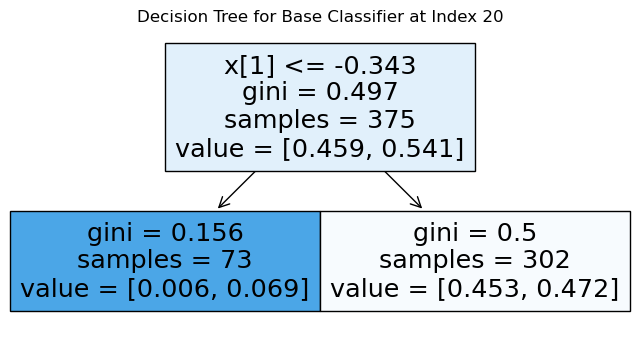

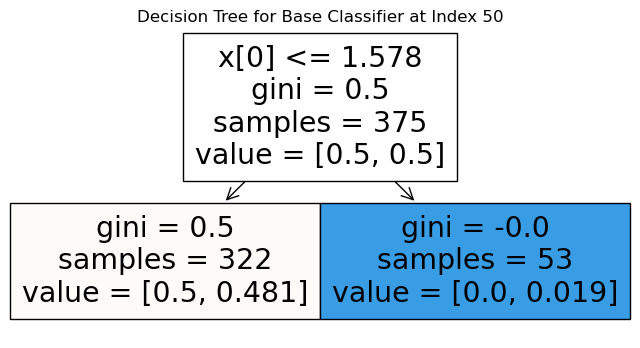

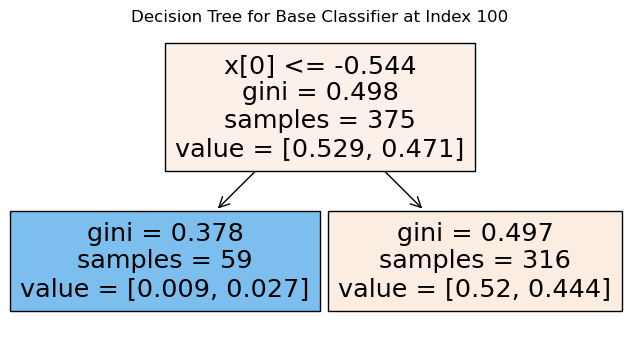

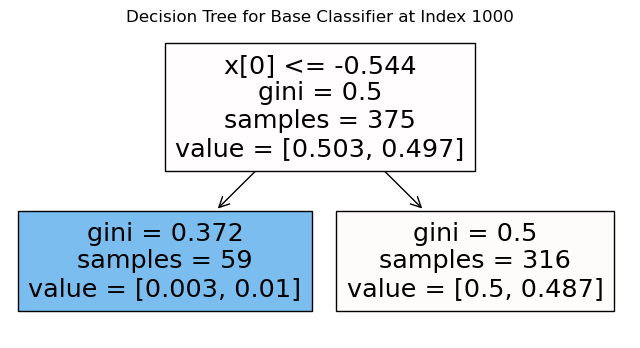

In [7]:
from sklearn.tree import plot_tree

# Decision trees with indices 0, 1, 2, 3, 4, 14, 20, 50, 100, 1000
tree_indices = [0, 1, 2, 3, 4, 14, 20, 50, 100, 1000]

for tree_index in tree_indices:
    plt.figure(figsize=(8, 4))
    plot_tree(base_classifiers[tree_index], filled=True)
    plt.title(f'Decision Tree for Base Classifier at Index {tree_index}')
    plt.show()


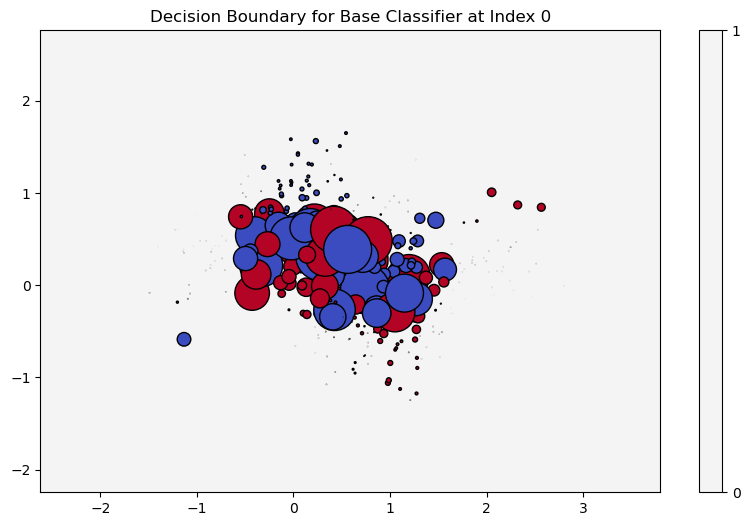

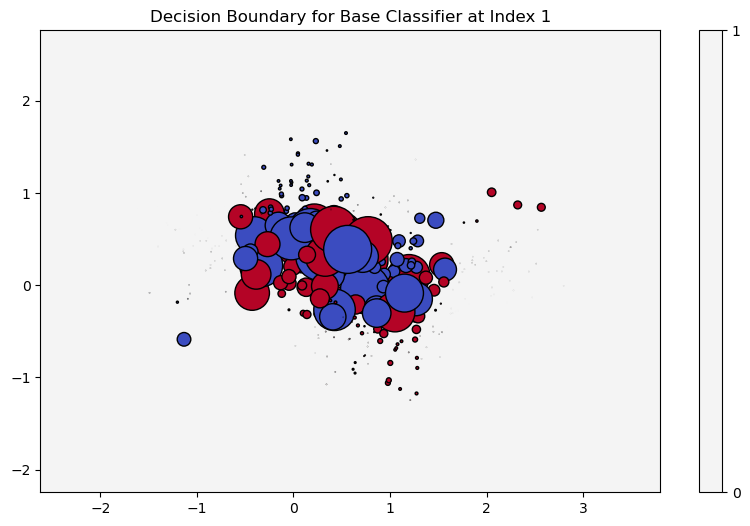

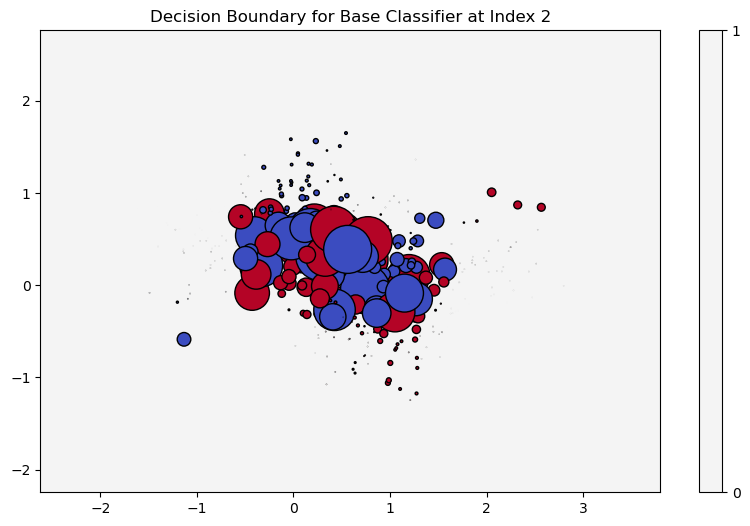

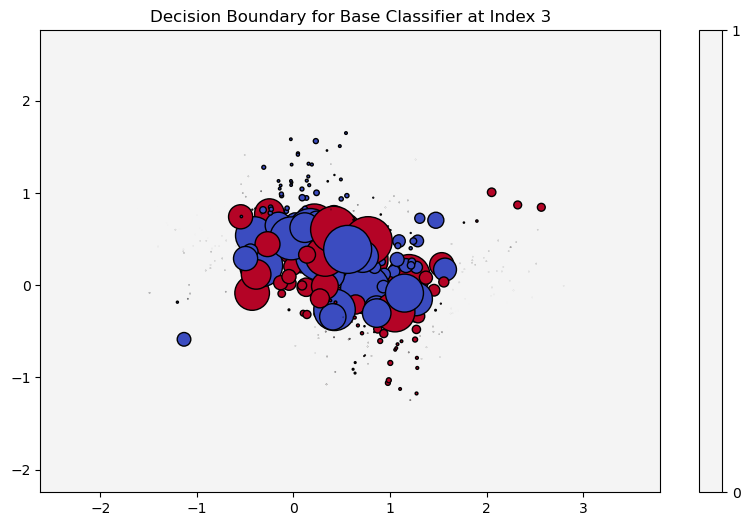

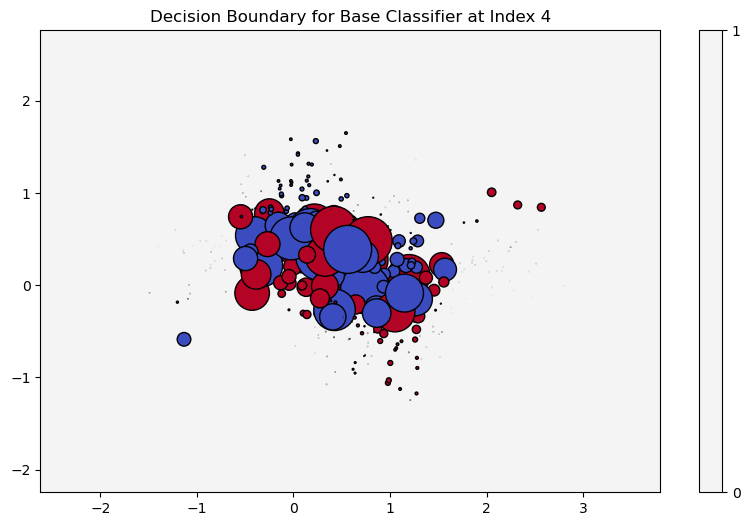

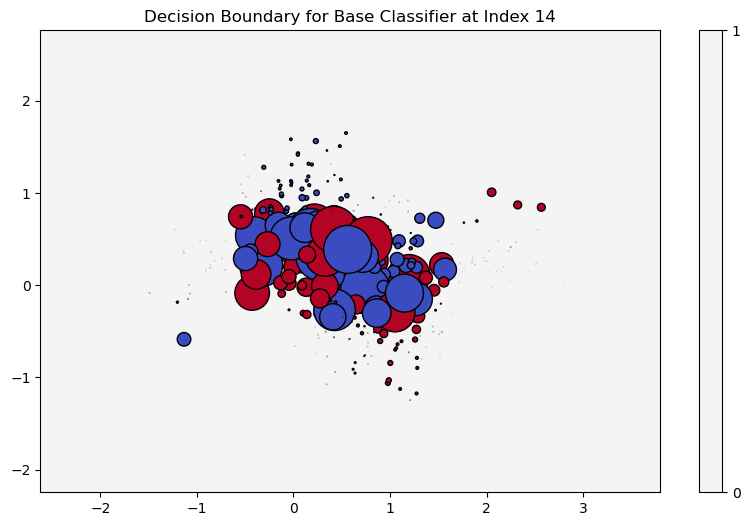

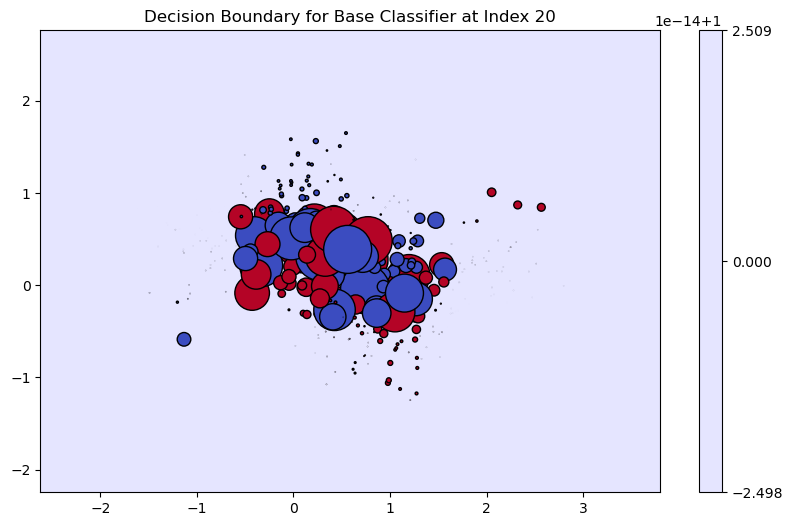

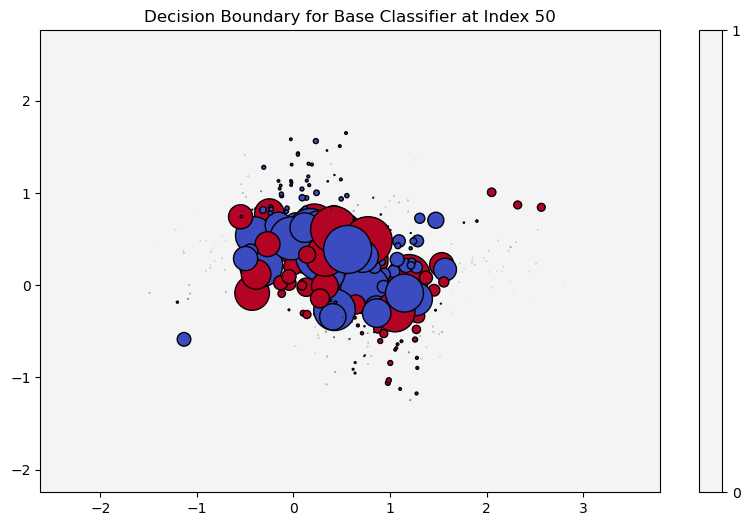

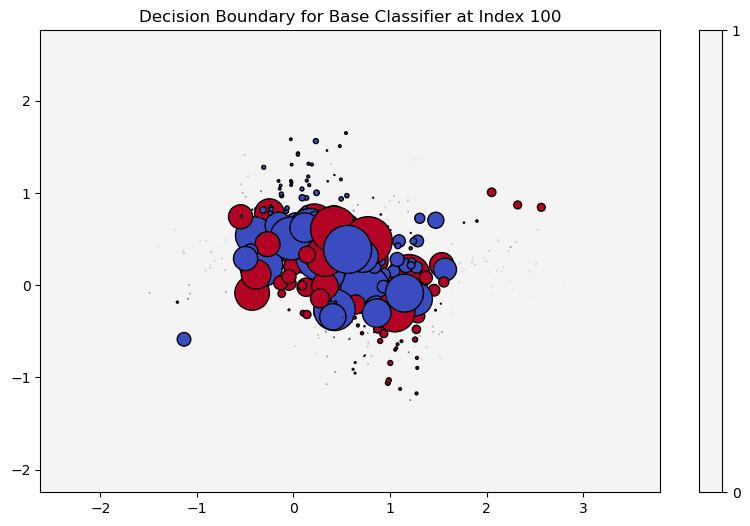

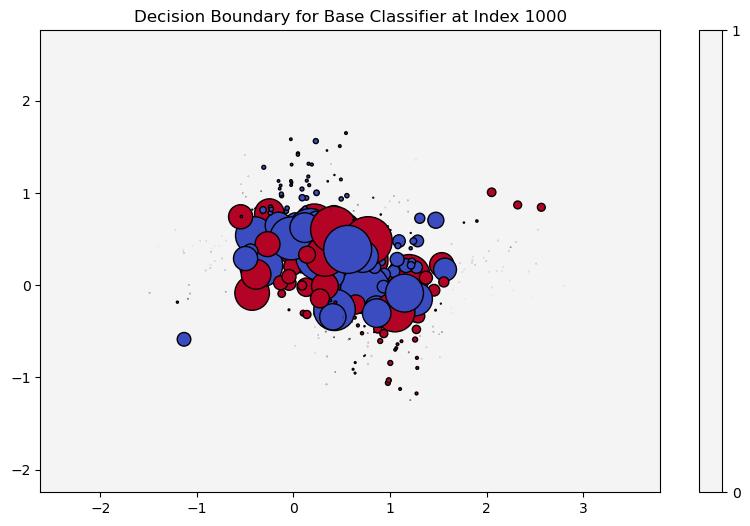

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(classifier, X, y, N=500, scatter_weights=None):
    # Create a mesh grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))
    
    # Predict on the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    
    if len(np.unique(Z)) == 1:
        # Only one class predicted, plot it as a single color
        plt.contourf(xx, yy, Z, alpha=0.3, colors=['#FFAAAA' if np.unique(Z)[0] == 0 else '#AAAAFF'])
    else:
        # Multiple classes predicted, plot contour
        plt.contourf(xx, yy, Z, alpha=0.3, levels=np.unique(Z), cmap='coolwarm')
    
    plt.colorbar()

    # Plot the scatter points
    if scatter_weights is not None:
        
        scatter_weights = scatter_weights * len(X) * 100
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=scatter_weights, edgecolor='k')
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')

# Plot decision boundaries for selected base classifiers
tree_indices = [0, 1, 2, 3, 4, 14, 20, 50, 100, 1000]  # Example indices
for tree_index in tree_indices:
    plt.figure(figsize=(10, 6))
    plot_decision_boundary(base_classifiers[tree_index], X_train, y_train, scatter_weights=weights)
    plt.title(f'Decision Boundary for Base Classifier at Index {tree_index}')
    plt.show()


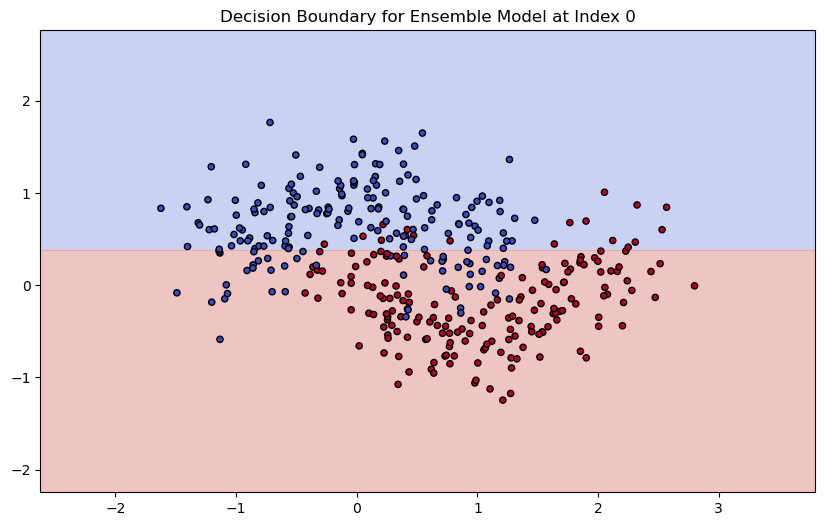

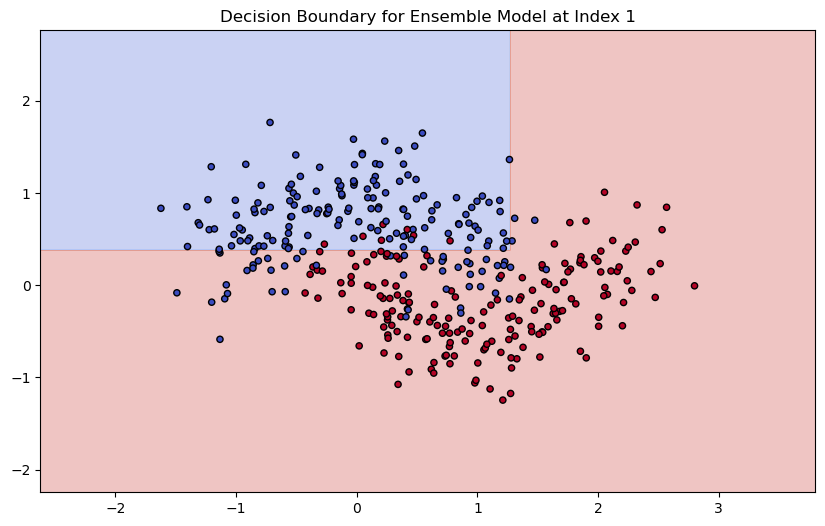

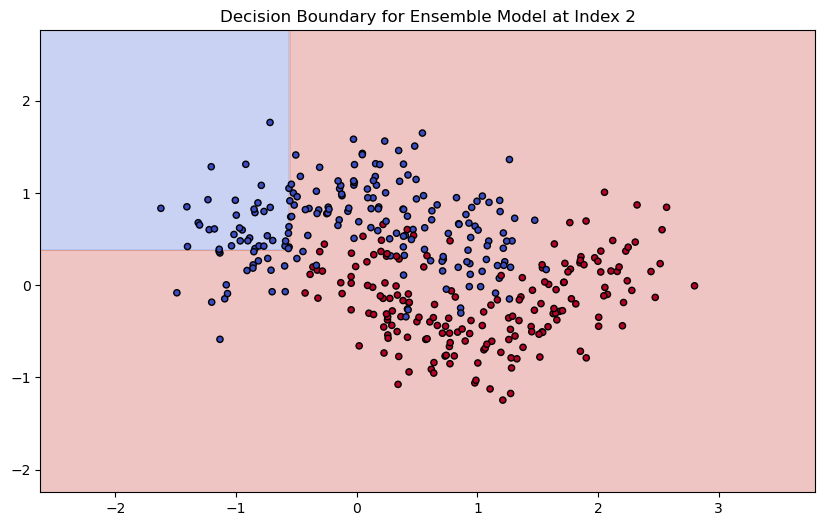

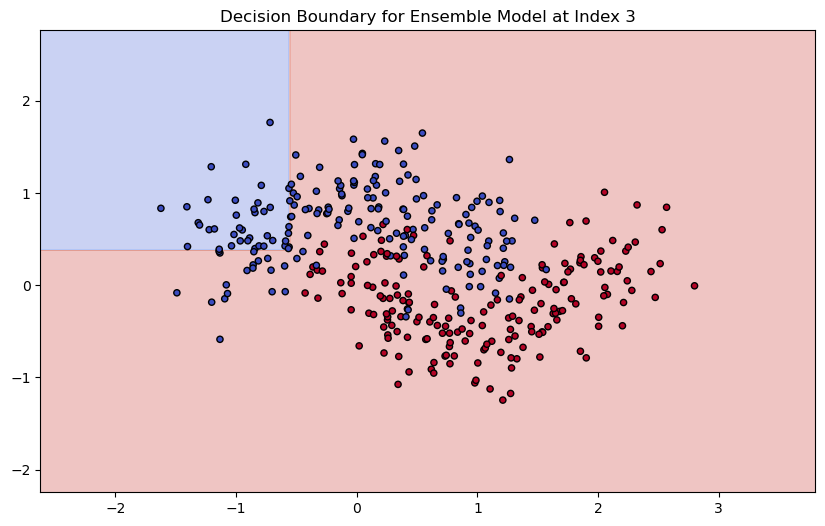

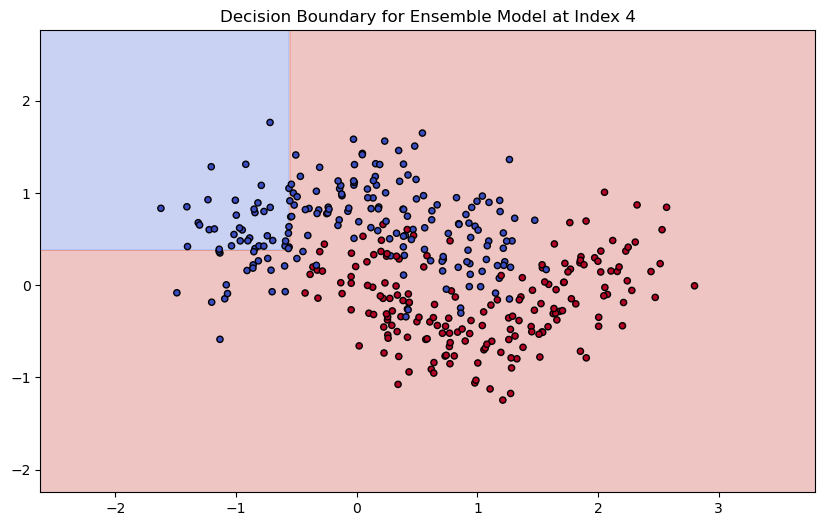

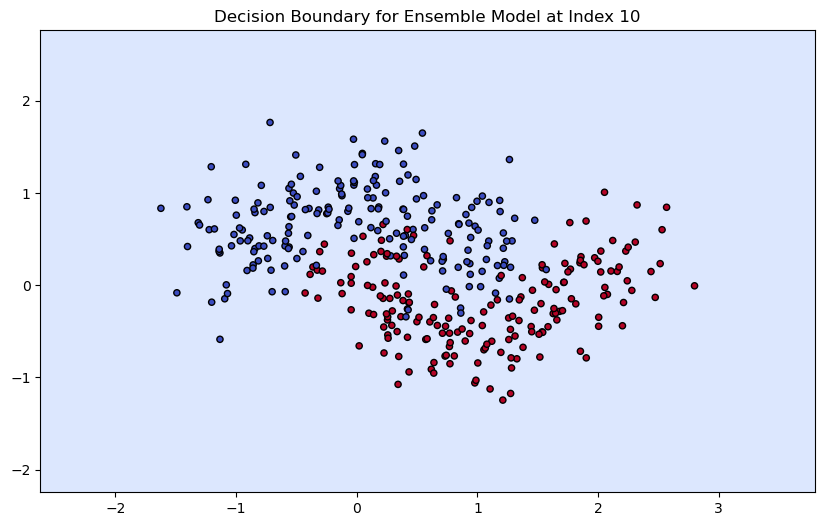

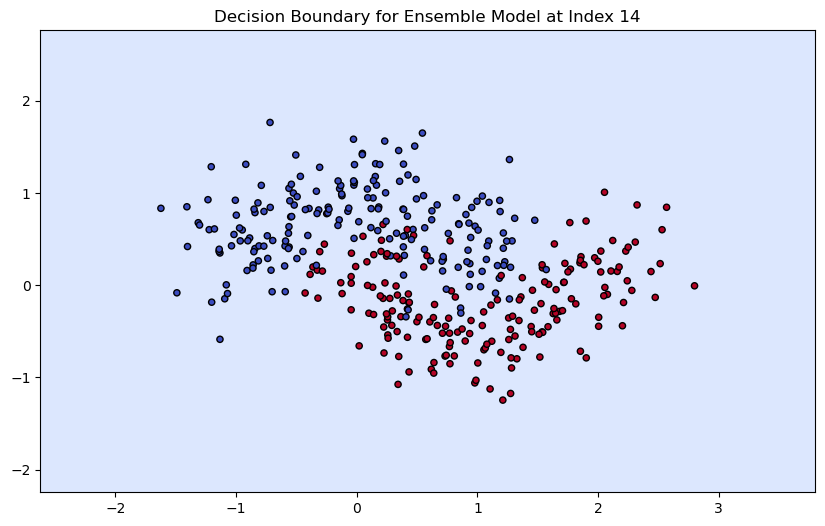

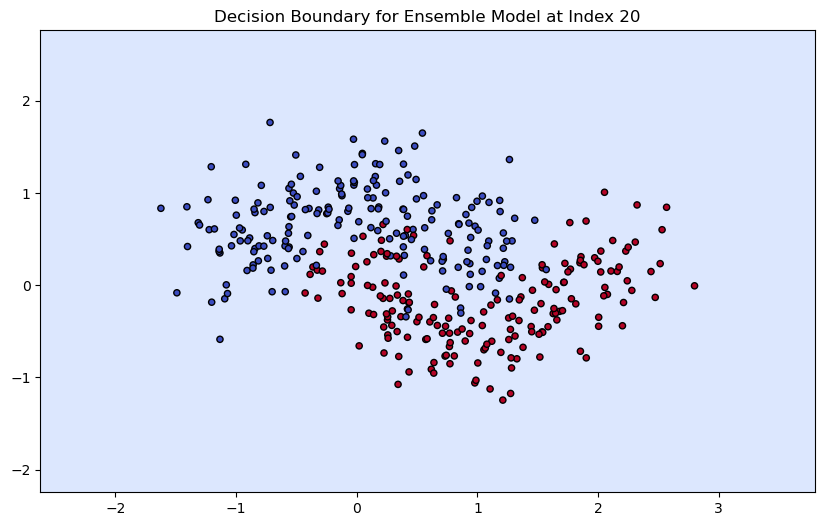

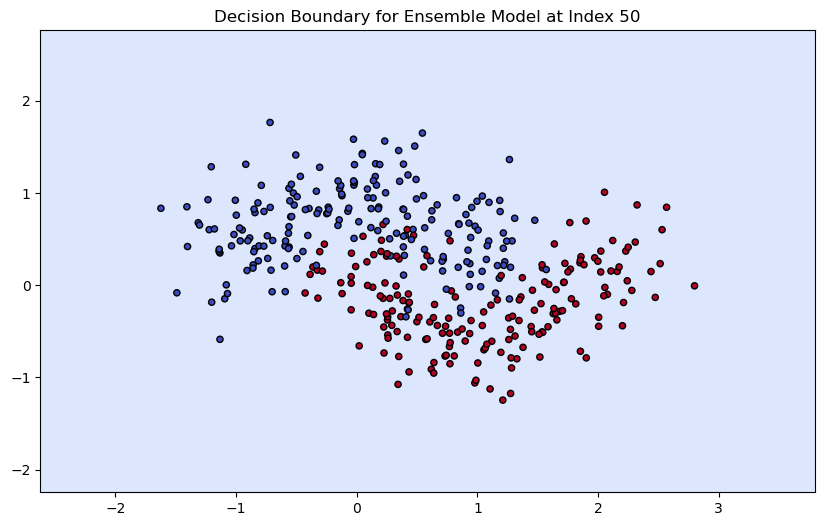

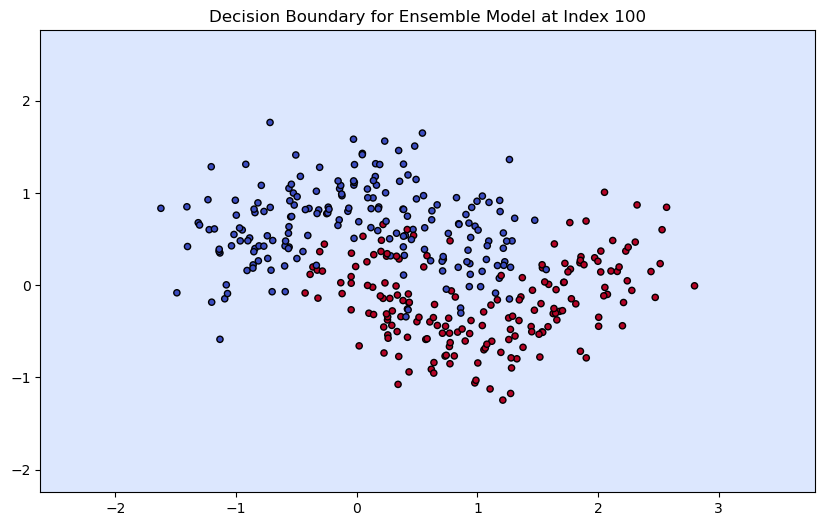

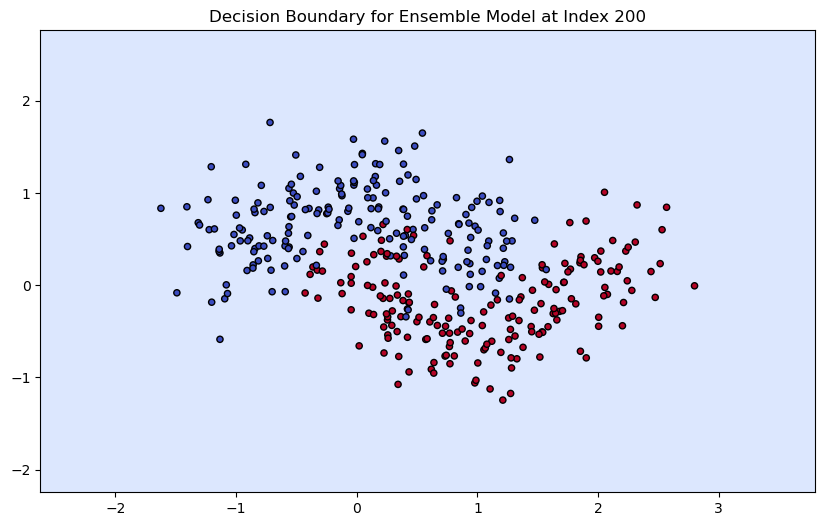

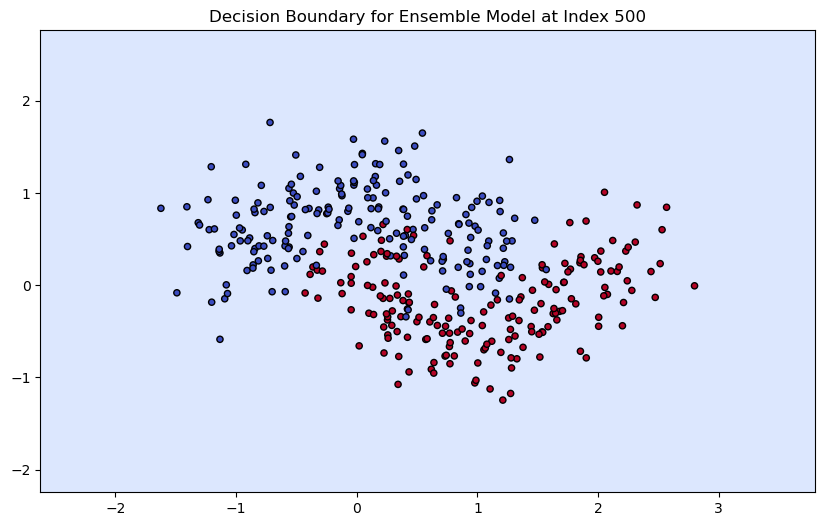

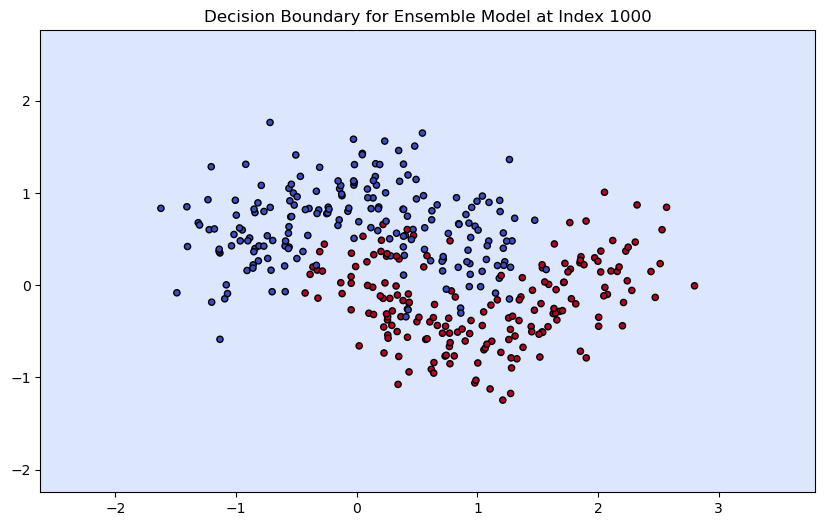

In [42]:
def ensemble_predict(base_classifiers, alphas, data, index):
    """Make a prediction with an ensemble of classifiers up to a given index."""
    # Weighted sum of predictions from all classifiers up to the specified index
    weighted_predictions = sum(alpha * clf.predict(data) for alpha, clf in zip(alphas[:index + 1], base_classifiers[:index + 1]))
    return np.sign(weighted_predictions)

# Function to plot decision boundary for ensemble
def plot_ensemble_decision_boundary(base_classifiers, alphas, X, y, ensemble_index, N=500, ax=None):
    # Create a mesh grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))
    
    # Predict on the mesh grid using the ensemble
    Z = ensemble_predict(base_classifiers, alphas, np.c_[xx.ravel(), yy.ravel()], ensemble_index)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20, edgecolor='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f'Decision Boundary for Ensemble Model at Index {ensemble_index}')

# Plot decision boundaries for selected ensemble models
ensemble_indices = [0, 1, 2, 3, 4, 10, 14, 20, 50, 100, 200, 500, 1000]
for ensemble_index in ensemble_indices:
    plt.figure(figsize=(10, 6))
    plot_ensemble_decision_boundary(base_classifiers, alphas, X_train, y_train, ensemble_index)
    plt.show()

